<a href="https://colab.research.google.com/github/KonradKomor/Carbios-ARIMA-stock-price-prediction/blob/master/Carbios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install --upgrade Cython
! pip install statsmodels
!pip install pmdarima
import statsmodels.api as sm

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import plotly.express as px

In [4]:
df= pd.read_excel('Dane Carbios.xlsx')

In [5]:
df

,Date,Open,High,Low,Close,Volume,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2020-08-17 17:39:59.904,26.85,28.00,26.80,27.35,74345,NaN,NaN,NaN
1,2020-08-18 17:39:59.904,27.50,29.10,27.50,29.10,71063,NaN,NaN,ALCRB
2,2020-08-19 17:39:59.904,29.50,29.65,28.25,29.50,51476,NaN,NaN,NaN
3,2020-08-20 17:39:59.904,29.00,29.90,28.45,29.60,40639,NaN,NaN,NaN
4,2020-08-21 17:39:59.904,30.00,32.45,29.95,31.40,89821,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
252,2021-08-10 17:39:59.904,43.10,43.90,42.54,43.76,15391,NaN,NaN,NaN
253,2021-08-11 17:39:59.904,43.90,44.00,43.52,43.88,13831,NaN,NaN,NaN
254,2021-08-12 17:39:59.904,43.88,45.58,43.52,45.58,37051,NaN,NaN,NaN
255,2021-08-13 17:39:59.904,45.50,45.56,43.32,44.00,22132,NaN,NaN,NaN


In [8]:
fig=px.area(data_frame=df, x='Date',y='Close')
fig.show()

In [10]:
fig=px.line(df,x='Date',y='Close')
fig.show()

In [11]:
fig=px.area(data_frame=df, x='Date',y='Close',log_y=True,title="Carbios stock price (%)")
fig.show()

In [12]:
x=df.Close
result=adfuller(x)

In [13]:
#Run Augmented Dickey-Fuller Test for testing the stationarity of the data
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.078506
p-value: 0.253245
critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


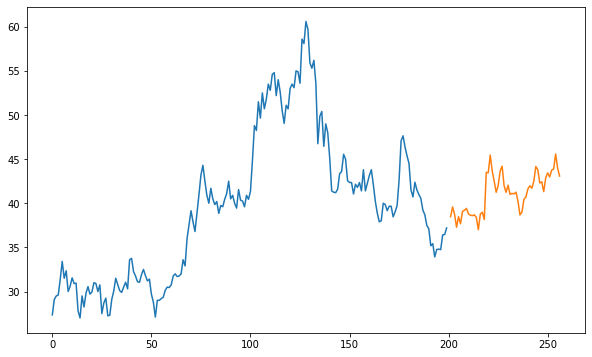

In [19]:
train=df.Close[:200]
test=df.Close[201:]
plt.plot(train)
plt.plot(test)

In [44]:
arimaModel=auto_arima(train,
                      test='adf',
                      m=1,
                      start_p=0,
                      start_q=0,
                      d=None,
                      max_p=5, max_q=5,
                      start_P=0,
                      D=0,
                      seasonal=False,
                      error_action='ignore', trace=True,
                      supress_warnings=True, stepwise=True,
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=761.505, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=763.320, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=763.325, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=759.690, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=765.496, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.247 seconds


In [42]:
print(arimaModel.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -378.845
Date:                Wed, 18 Aug 2021   AIC                            759.690
Time:                        07:03:09   BIC                            762.983
Sample:                             0   HQIC                           761.023
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.6369      0.203     12.989      0.000       2.239       3.035
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                17.58
Prob(Q):                              0.67   Pr

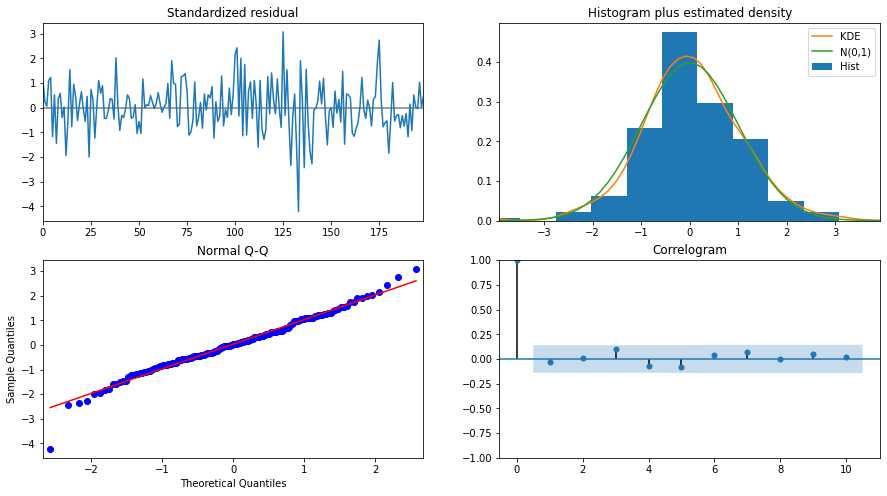

In [43]:
arimaModel.plot_diagnostics(figsize=(15,8))
plt.show()

In [53]:
model=ARIMA(train,order=(0,1,0))
fitted=model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  256
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -475.122
Method:                           css   S.D. of innovations              1.548
Date:                Wed, 18 Aug 2021   AIC                            954.243
Time:                        08:39:40   BIC                            961.334
Sample:                             1   HQIC                           957.095
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0614      0.097      0.635      0.525      -0.128       0.251


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




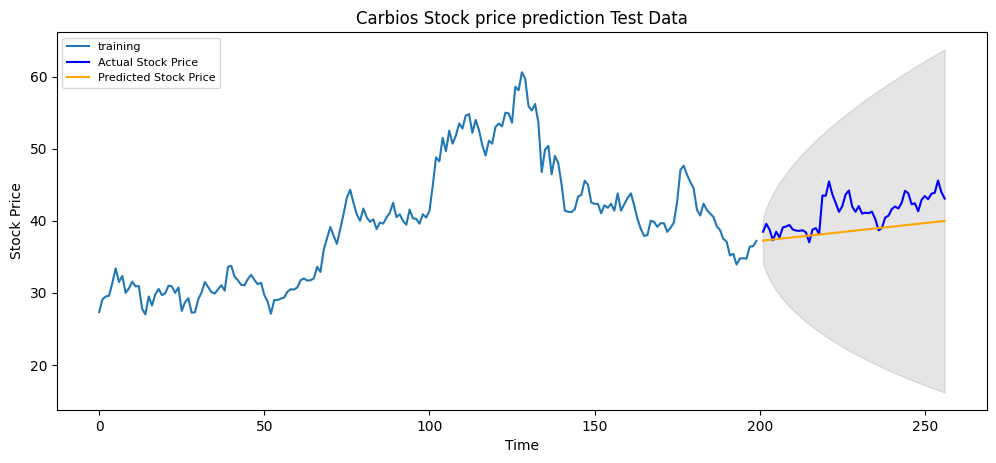

In [48]:
fc, se, conf = fitted.forecast(56,alpha=0.05)
fcSeries = pd.Series(fc, index=test.index)
lowerSeries=pd.Series(conf[:,0],index=test.index)
upperSeries=pd.Series(conf[:, 1],index=test.index)
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train,label='training')
plt.plot(test,color='blue',label='Actual Stock Price')
plt.plot(fcSeries,color='orange',label='Predicted Stock Price')
plt.fill_between(lowerSeries.index,lowerSeries,upperSeries,color='k',alpha=.10)
plt.title('Carbios Stock price prediction Test Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [49]:
train=df.Close

In [50]:
#Actual model for future stocks
arimaModel=auto_arima(train,
                      test='adf',
                      m=1,
                      start_p=0,
                      start_q=0,
                      d=None,
                      max_p=5, max_q=5,
                      start_P=0,
                      D=0,
                      seasonal=False,
                      error_action='ignore', trace=True,
                      supress_warnings=True, stepwise=True,
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=954.243, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=955.806, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=955.813, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=952.646, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=957.805, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.444 seconds


In [51]:
print(arimaModel.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  257
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -475.323
Date:                Wed, 18 Aug 2021   AIC                            952.646
Time:                        08:38:50   BIC                            956.191
Sample:                             0   HQIC                           954.072
                                - 257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.4003      0.155     15.531      0.000       2.097       2.703
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                33.81
Prob(Q):                              0.51   Pr

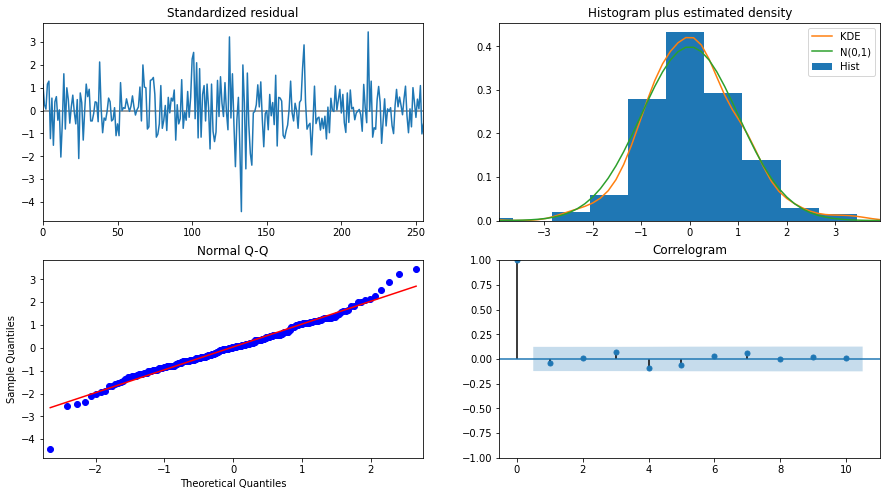

In [52]:
arimaModel.plot_diagnostics(figsize=(15,8))
plt.show()

In [82]:
model=ARIMA(train,order=(0,1,0))
fitted=model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  256
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -475.122
Method:                           css   S.D. of innovations              1.548
Date:                Wed, 18 Aug 2021   AIC                            954.243
Time:                        08:59:55   BIC                            961.334
Sample:                             1   HQIC                           957.095
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0614      0.097      0.635      0.525      -0.128       0.251


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [86]:
prediction=pd.DataFrame(fitted.forecast(7)[0])

In [87]:
prediction

,0
0,43.141445
1,43.202891
2,43.264336
3,43.325781
4,43.387227
5,43.448672
6,43.510117
